In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import mglearn

from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Read and Analize datasets**

In [ ]:
# Read the dataset
file_path = '/content/drive/MyDrive/Datasets/credit+approval/data.csv'
df = pd.read_csv(file_path)
df.head(3)

A1     A2    A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.00  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.46  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.50  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


Є пусті значення, їх небагато, тому можемо спробувати дозаповнити їх медіаною для числових і модами для категоріальних

In [ ]:
df.describe(include='all')

A1          A2          A3   A4   A5   A6   A7          A8   A9  A10  \
count   678  678.000000  690.000000  684  684  681  681  690.000000  690  690   
unique    2         NaN         NaN    3    3   14    9         NaN    2    2   
top       b         NaN         NaN    u    g    c    v         NaN    t    f   
freq    468         NaN         NaN  519  519  137  399         NaN  361  395   
mean    NaN   31.568171    4.758725  NaN  NaN  NaN  NaN    2.223406  NaN  NaN   
std     NaN   11.957862    4.978163  NaN  NaN  NaN  NaN    3.346513  NaN  NaN   
min     NaN   13.750000    0.000000  NaN  NaN  NaN  NaN    0.000000  NaN  NaN   
25%     NaN   22.602500    1.000000  NaN  NaN  NaN  NaN    0.165000  NaN  NaN   
50%     NaN   28.460000    2.750000  NaN  NaN  NaN  NaN    1.000000  NaN  NaN   
75%     NaN   38.230000    7.207500  NaN  NaN  NaN  NaN    2.625000  NaN  NaN   
max     NaN   80.250000   28.000000  NaN  NaN  NaN  NaN   28.500000  NaN  NaN   

              A11  A12  A13          A14            A15  A16  
count   690.00000  690  690   677.000000     690.000000  690  
unique        NaN    2    3          NaN            NaN    2  
top           NaN    f    g          NaN            NaN    -  
freq          NaN  374  625          NaN            NaN  383  
mean      2.40000  NaN  NaN   184.014771    1017.385507  NaN  
std       4.86294  NaN  NaN   173.806768    5210.102598  NaN  
min       0.00000  NaN  NaN     0.000000       0.000000  NaN  
25%       0.00000  NaN  NaN    75.000000       0.000000  NaN  
50%       0.00000  NaN  NaN   160.000000       5.000000  NaN  
75%       3.00000  NaN  NaN   276.000000     395.500000  NaN  
max      67.00000  NaN  NaN  2000.000000  100000.000000  NaN

Великий розрив значень між mean та min та/або max значеннями говорить про те що можуть бути викиди. Особливо виділяється признак A15 великими викидами по верхньому рівню.

In [ ]:
# Divide columns to numerical and categorical
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
cols_cat = df.select_dtypes(include=['object']).columns

# Generate a correlation matrix and visualize possible correlations between all numerical columns
correlation_matrix_1 = df[cols_num].corr()
mask1 = np.triu(correlation_matrix_1)

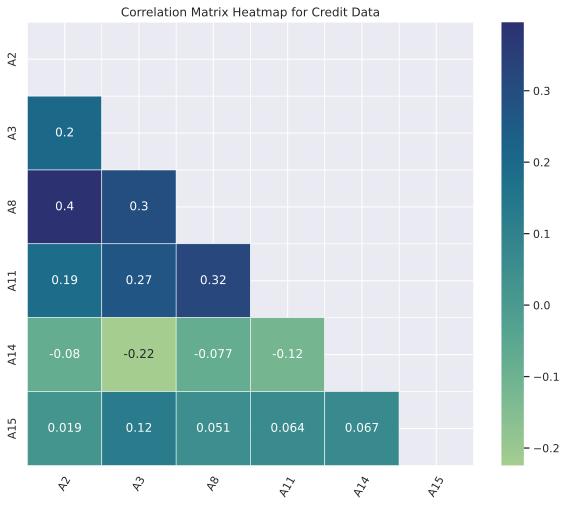

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap='crest', linewidths=0.5, mask=mask1)
plt.title('Correlation Matrix Heatmap for Credit Data')
plt.xticks(rotation=60)
plt.show()

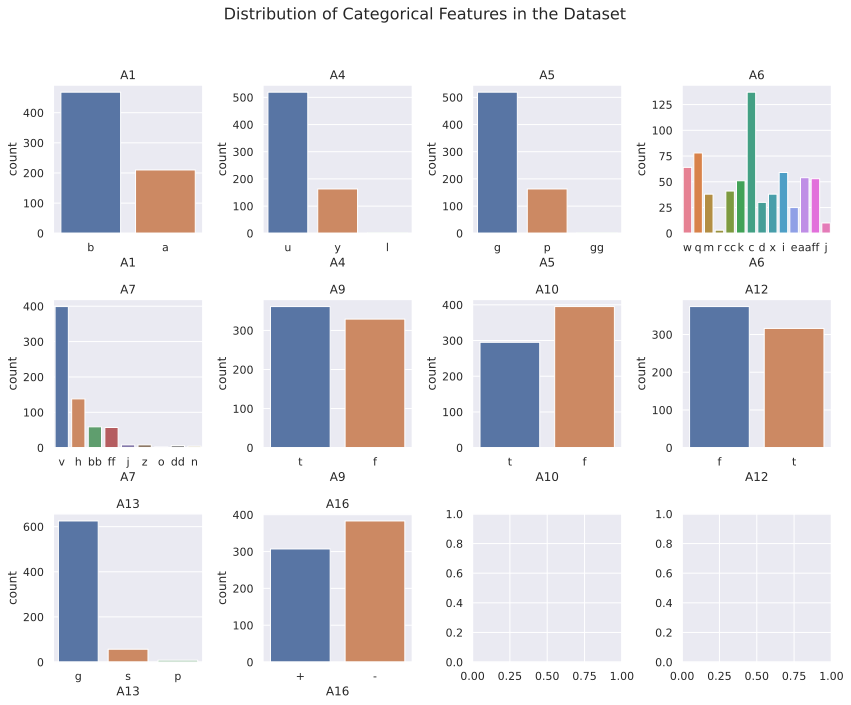

In [ ]:
# Visualize distribution of categorical features
# including the target 'A16' - credit approved (+) or not(-)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Features in the Dataset', fontsize=16)

# Generate box plots for each column
for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col, stat='count', data=df, legend=False, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

В нашого таргета непоганий баланс класів для класифікації

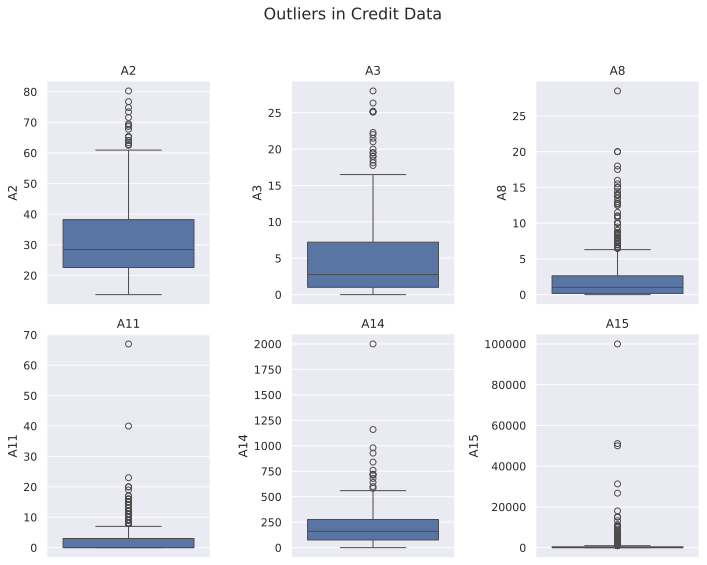

In [ ]:
# Let's check whether the features have outliers
# Set up the figure for the plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
fig.suptitle('Outliers in Credit Data', fontsize=16)

# Generate box plots for each column
for i, col in enumerate(cols_num):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Майже всі признаки мають викиди, іноді як наприклад у '**A15**' та '**A14**' дуже великі у максимальних значеннях.

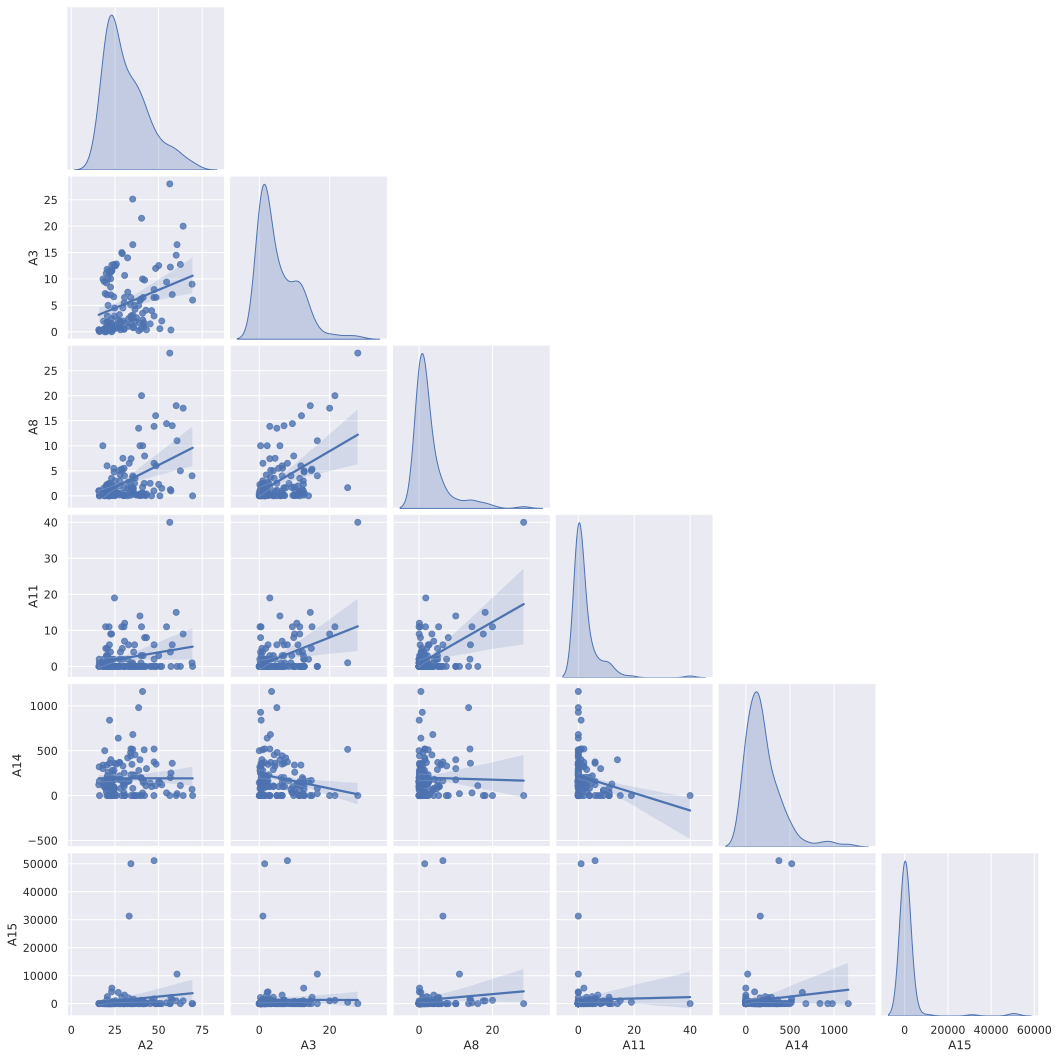

In [ ]:
# Let's visualize relationship between all features
sns.pairplot(df.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='kde');

* Бачимо що деякі признаки мають строгу позитивну або негативну кореляцію - це добре. Але інформації замало так як багато признаків в нас категоріальні.
* Трансформуємо їх в числові і отримаємо загальну інформацію по всім признакам включно з таргетом.

## **2. Clean Data and Feature Engineering**

### 2.1. Fill-in NaN values

In [ ]:
# Fill NaN values (median for numerical, moda for categorical)
for col in cols_num:
    df[col].fillna(df[col].median(), inplace=True)

for col in cols_cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

### 2.2. Categorical to Numerical

In [ ]:
# Transform categorical data to numerical excluding target - one hot encoding
df = pd.get_dummies(df, columns=cols_cat[:-1], drop_first=True)

In [ ]:
# Transform target into binary numerical
df['A16'] = df['A16'].map({'+': 1, '-': 0})
df['A16'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      690 non-null    float64
 1   A3      690 non-null    float64
 2   A8      690 non-null    float64
 3   A11     690 non-null    int64  
 4   A14     690 non-null    float64
 5   A15     690 non-null    int64  
 6   A16     690 non-null    int64  
 7   A1_b    690 non-null    bool   
 8   A4_u    690 non-null    bool   
 9   A4_y    690 non-null    bool   
 10  A5_gg   690 non-null    bool   
 11  A5_p    690 non-null    bool   
 12  A6_c    690 non-null    bool   
 13  A6_cc   690 non-null    bool   
 14  A6_d    690 non-null    bool   
 15  A6_e    690 non-null    bool   
 16  A6_ff   690 non-null    bool   
 17  A6_i    690 non-null    bool   
 18  A6_j    690 non-null    bool   
 19  A6_k    690 non-null    bool   
 20  A6_m    690 non-null    bool   
 21  A6_q    690 non-null    bool   
 22  A6

In [ ]:
# Create a matrix of scatter diagram
qrr = scatter_matrix(df[cols_num], c=df['A16'], figsize=(15,12), marker='o', s=60, hist_kwds={'bins': 20},  alpha=.7, cmap=mglearn.cm2, grid=True)

Бачимо, що можно відокремити класи (0, 1) таргету один від одного, це означає що є хороші шанси навчити модель так саме розрізнювати класи.

### 2.3. Remove Outliers

In [ ]:
# Remove outliers with IQR
def filter_outliers(data):
    '''
    Filter outliers from numerical features
    using Interquartile Range
    '''
    num_data = data.select_dtypes(include=['float64', 'int64'])
    Q1 = num_data.quantile(0.20)  # I have widened range standard=0.25 - 0.75
    Q3 = num_data.quantile(0.90)
    IQR = Q3 - Q1
    return data[~((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exclude categorical feature from the filter
df_filtered = filter_outliers(df)

original_shape = df.shape
filtered_shape = df_filtered.shape
print(f"Original shape: {original_shape}, \nFiltered shape: {filtered_shape}")

Original shape: (690, 38), 
Filtered shape: (648, 38)


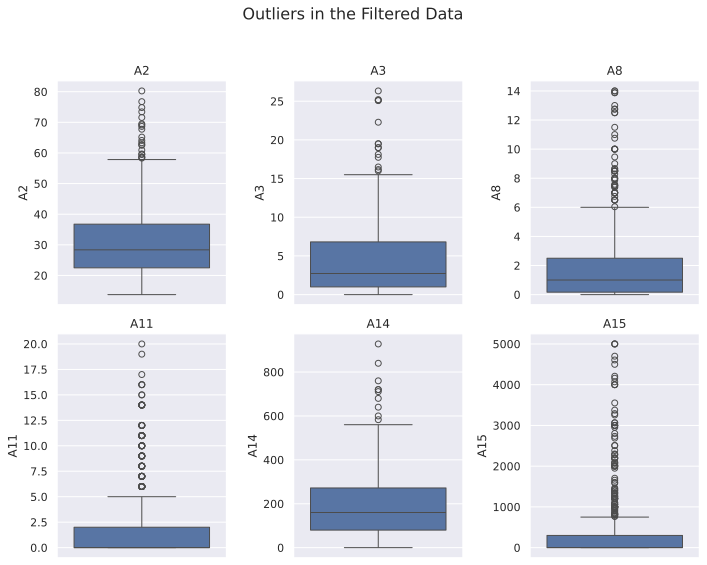

 We have now 648 lines of observations


In [ ]:
# Let's check outliers of the filtered values
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
fig.suptitle('Outliers in the Filtered Data', fontsize=16)

# Generate box plots for each column
for i, col in enumerate(cols_num):
    sns.boxplot(y=df_filtered[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f" We have now {df_filtered.shape[0]} lines of observations")

### 2.4. Scale values

In [ ]:
# Separate target
X = df_filtered.drop('A16', axis=1)
y = df_filtered['A16']

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### 2.5. Split train/val/test

In [ ]:
# Split data 70/20/10 - If we split to 80/20 the metrics will be better
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

### 2.6. Visualization

In [ ]:
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    classes = list(report.keys())[:-3]
    metrics = ['precision', 'recall', 'f1-score']

    # Write data on class, metric and values
    data = []
    for cls in classes:
        for metric in metrics:
            data.append((cls, metric, report[cls][metric]))

    # Create new dataset for the report
    df = pd.DataFrame(data, columns=['class', 'metric', 'value'])

    # Plot result
    plt.figure(figsize=(10, 6))
    sns.barplot(x='class', y='value', hue='metric', data=df)
    plt.title(title)
    plt.show()

## **3. Build DecisionTreeClassifier Model**


In [ ]:
# Params for GridSearch
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize classifier
clf_dtree = DecisionTreeClassifier(random_state=42)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit classification model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the best model on the val and test sets
best_dtree = grid_search.best_estimator_
y_val_pred_1 = best_dtree.predict(X_val)
val_report_1 = classification_report(y_val, y_val_pred_1)

y_test_pred_1 = best_dtree.predict(X_test)
test_report_1 = classification_report(y_test, y_test_pred_1)

print("Best Parameters:\n", best_params)
print("Validation Report:\n", val_report_1)
print("Test Report:\n", test_report_1)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters:
 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Validation Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.79      0.69      0.73        48

    accuracy                           0.82       130
   macro avg       0.81      0.79      0.80       130
weighted avg       0.81      0.82      0.81       130

Test Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        34
           1       0.72      0.68      0.70        31

    accuracy                           0.72        65
   macro avg       0.72      0.72      0.72        65
weighted avg       0.72      0.72      0.72        65



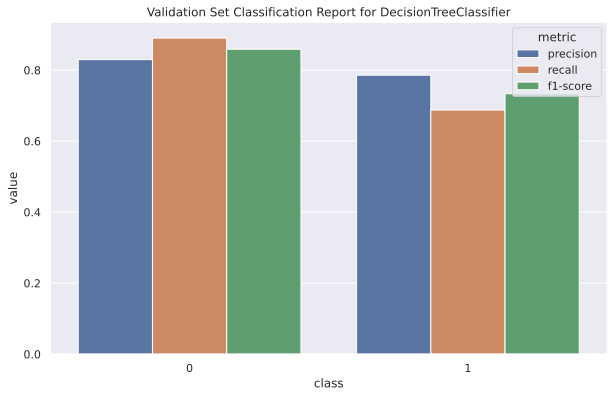

In [ ]:
plot_classification_report(y_val, y_val_pred_1, 'Validation Set Classification Report for DecisionTreeClassifier')

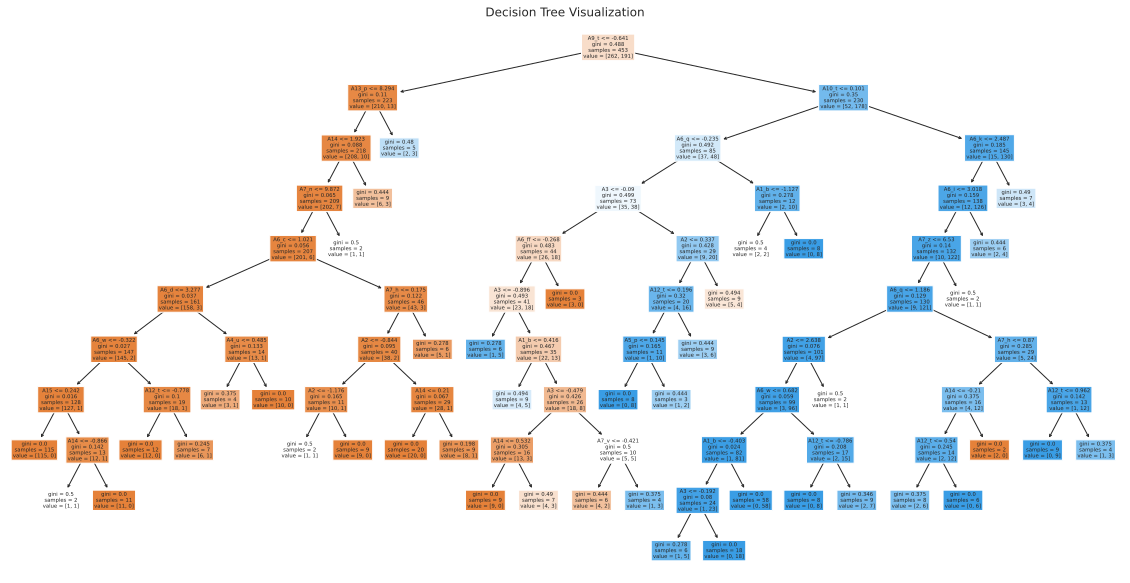

In [ ]:
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(best_dtree, filled=True, feature_names=X.columns) # class_names=le.classes_)
plt.title("Decision Tree Visualization")
plt.show()

## **4. Compare the Model with LogisticRegression and Metric Models**

### 4.1. Train and Evaluate Logistic Regression Model

In [ ]:
# Define the range of parameters for LogisticRegression
param_grid_3 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [25, 50, 100, 200]
}

# Initialize LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [ ]:
# Initialize GridSearchCV
grid_search_3 = GridSearchCV(estimator=log_reg, param_grid=param_grid_3, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_3.fit(X_train, y_train)

# Get the best parameters
best_params_3 = grid_search_3.best_params_

# Evaluate the best model on the val and test sets
best_log_reg = grid_search_3.best_estimator_
y_val_pred_3 = best_log_reg.predict(X_val)
val_report_3 = classification_report(y_val, y_val_pred_3)

y_test_pred_3 = best_log_reg.predict(X_test)
test_report_3 = classification_report(y_test, y_test_pred_3)

print("Best Parameters:", best_params_3)
print("Validation Report:\n", val_report_3)
print("Test Report:\n", test_report_3)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'C': 0.01, 'max_iter': 25, 'penalty': 'l2', 'solver': 'newton-cg'}
Validation Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.82      0.75      0.78        48

    accuracy                           0.85       130
   macro avg       0.84      0.83      0.83       130
weighted avg       0.84      0.85      0.84       130

Test Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.89      0.77      0.83        31

    accuracy                           0.85        65
   macro avg       0.85      0.84      0.84        65
weighted avg       0.85      0.85      0.85        65



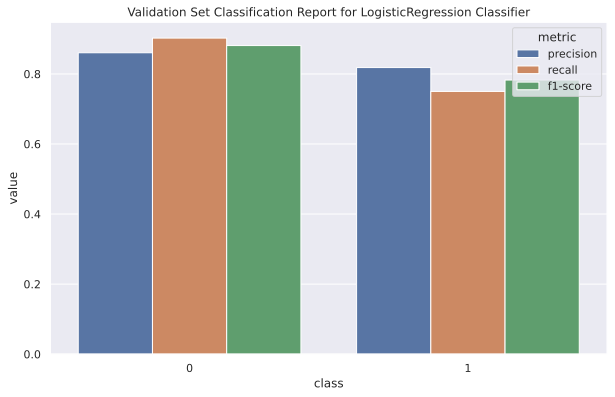

In [ ]:
# Validation set classification report
plot_classification_report(y_val, y_val_pred_3, 'Validation Set Classification Report for LogisticRegression Classifier')

### 4.2. Train and Evaluate Metric Classification Model (KNeighborsClassifier)

In [ ]:
# Define the range of parameters for GridSearchCV
param_grid_2 = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize the classifier
cls_knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_2 = GridSearchCV(estimator=cls_knn, param_grid=param_grid_2, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_2.fit(X_train, y_train)

# Get the best parameters
best_params_2 = grid_search_2.best_params_

# Evaluate the best model on the val and test sets
best_knn = grid_search_2.best_estimator_
y_val_pred_best = best_knn.predict(X_val)
val_report_best = classification_report(y_val, y_val_pred_best)

y_test_pred_best = best_knn.predict(X_test)
test_report_best = classification_report(y_test, y_test_pred_best)

print("Best Parameters:", best_params_2)
print("Validation Report:\n", val_report_best)
print("Test Report:\n", test_report_best)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Validation Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        82
           1       0.92      0.71      0.80        48

    accuracy                           0.87       130
   macro avg       0.88      0.84      0.85       130
weighted avg       0.88      0.87      0.86       130

Test Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        34
           1       0.88      0.68      0.76        31

    accuracy                           0.80        65
   macro avg       0.82      0.79      0.80        65
weighted avg       0.81      0.80      0.80        65



* Збалансована метрика F1 на валідаційному датасеті = 0.85
* Збалансована метрика F1 на тестовому датасеті = 0.80
* По класам модель краще всього знаходить 0 - ті кому відмовили в кредиті.

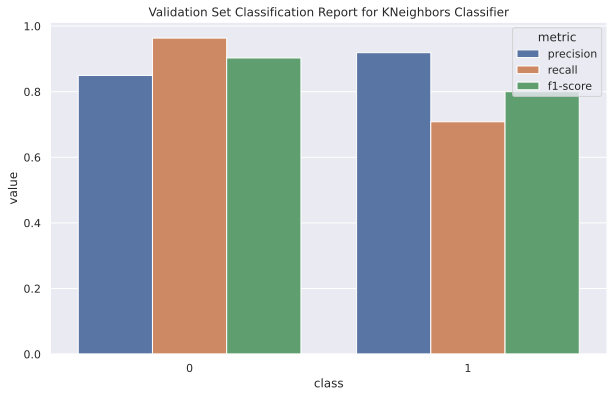

In [ ]:
# Validation set classification report
plot_classification_report(y_val, y_val_pred_best, 'Validation Set Classification Report for KNeighbors Classifier')

Model KNeighborsClassifier shows best performance

################## END OF THE NOTEBOOK #######################